In [1]:
# pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [8]:
X.shape

(8124, 22)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", 
           "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", 
           "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", 
           "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", 
           "spore-print-color", "population", "habitat"]

data = pd.read_csv(url, header=None, names=columns)

# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

# Separate features and target
X = data.drop("class", axis=1)
y = data["class"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [11]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")


Decision Tree Accuracy: 1.0


In [12]:
from sklearn.svm import SVC

# Train the model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")


SVM Accuracy: 0.961033634126333


In [19]:
from sklearn.linear_model import LogisticRegression

# Train the model
log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train, y_train)

# Predict on test data
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")


Logistic Regression Accuracy: 0.9495488105004102


c:\Users\djt1414\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")


Gradient Boosting Accuracy: 1.0


In [14]:
# Separate features and target
X_odor = data.drop("odor", axis=1)
y_odor = data["odor"]

# Split the data
X_train_odor, X_test_odor, y_train_odor, y_test_odor = train_test_split(X_odor, y_odor, test_size=0.3, random_state=42)

# Train a RandomForest model
model_odor = RandomForestClassifier(n_estimators=100, random_state=42)
model_odor.fit(X_train_odor, y_train_odor)

# Predict and evaluate
y_pred_odor = model_odor.predict(X_test_odor)
accuracy_odor = accuracy_score(y_test_odor, y_pred_odor)
print(f"Accuracy for predicting odor: {accuracy_odor}")


Accuracy for predicting odor: 0.7054963084495488


In [15]:
# Separate features and target
X_cap_color = data.drop("cap-color", axis=1)
y_cap_color = data["cap-color"]

# Split the data
X_train_cap_color, X_test_cap_color, y_train_cap_color, y_test_cap_color = train_test_split(X_cap_color, y_cap_color, test_size=0.3, random_state=42)

# Train a RandomForest model
model_cap_color = RandomForestClassifier(n_estimators=100, random_state=42)
model_cap_color.fit(X_train_cap_color, y_train_cap_color)

# Predict and evaluate
y_pred_cap_color = model_cap_color.predict(X_test_cap_color)
accuracy_cap_color = accuracy_score(y_test_cap_color, y_pred_cap_color)
print(f"Accuracy for predicting cap color: {accuracy_cap_color}")


Accuracy for predicting cap color: 0.12551271534044298


In [16]:
# Separate features and target
X_habitat = data.drop("habitat", axis=1)
y_habitat = data["habitat"]

# Split the data
X_train_habitat, X_test_habitat, y_train_habitat, y_test_habitat = train_test_split(X_habitat, y_habitat, test_size=0.3, random_state=42)

# Train a RandomForest model
model_habitat = RandomForestClassifier(n_estimators=100, random_state=42)
model_habitat.fit(X_train_habitat, y_train_habitat)

# Predict and evaluate
y_pred_habitat = model_habitat.predict(X_test_habitat)
accuracy_habitat = accuracy_score(y_test_habitat, y_pred_habitat)
print(f"Accuracy for predicting habitat: {accuracy_habitat}")


Accuracy for predicting habitat: 0.48810500410172275


In [17]:
# Separate features and target
X_gill_color = data.drop("gill-color", axis=1)
y_gill_color = data["gill-color"]

# Split the data
X_train_gill_color, X_test_gill_color, y_train_gill_color, y_test_gill_color = train_test_split(X_gill_color, y_gill_color, test_size=0.3, random_state=42)

# Train a RandomForest model
model_gill_color = RandomForestClassifier(n_estimators=100, random_state=42)
model_gill_color.fit(X_train_gill_color, y_train_gill_color)

# Predict and evaluate
y_pred_gill_color = model_gill_color.predict(X_test_gill_color)
accuracy_gill_color = accuracy_score(y_test_gill_color, y_pred_gill_color)
print(f"Accuracy for predicting gill color: {accuracy_gill_color}")


Accuracy for predicting gill color: 0.24241181296144382


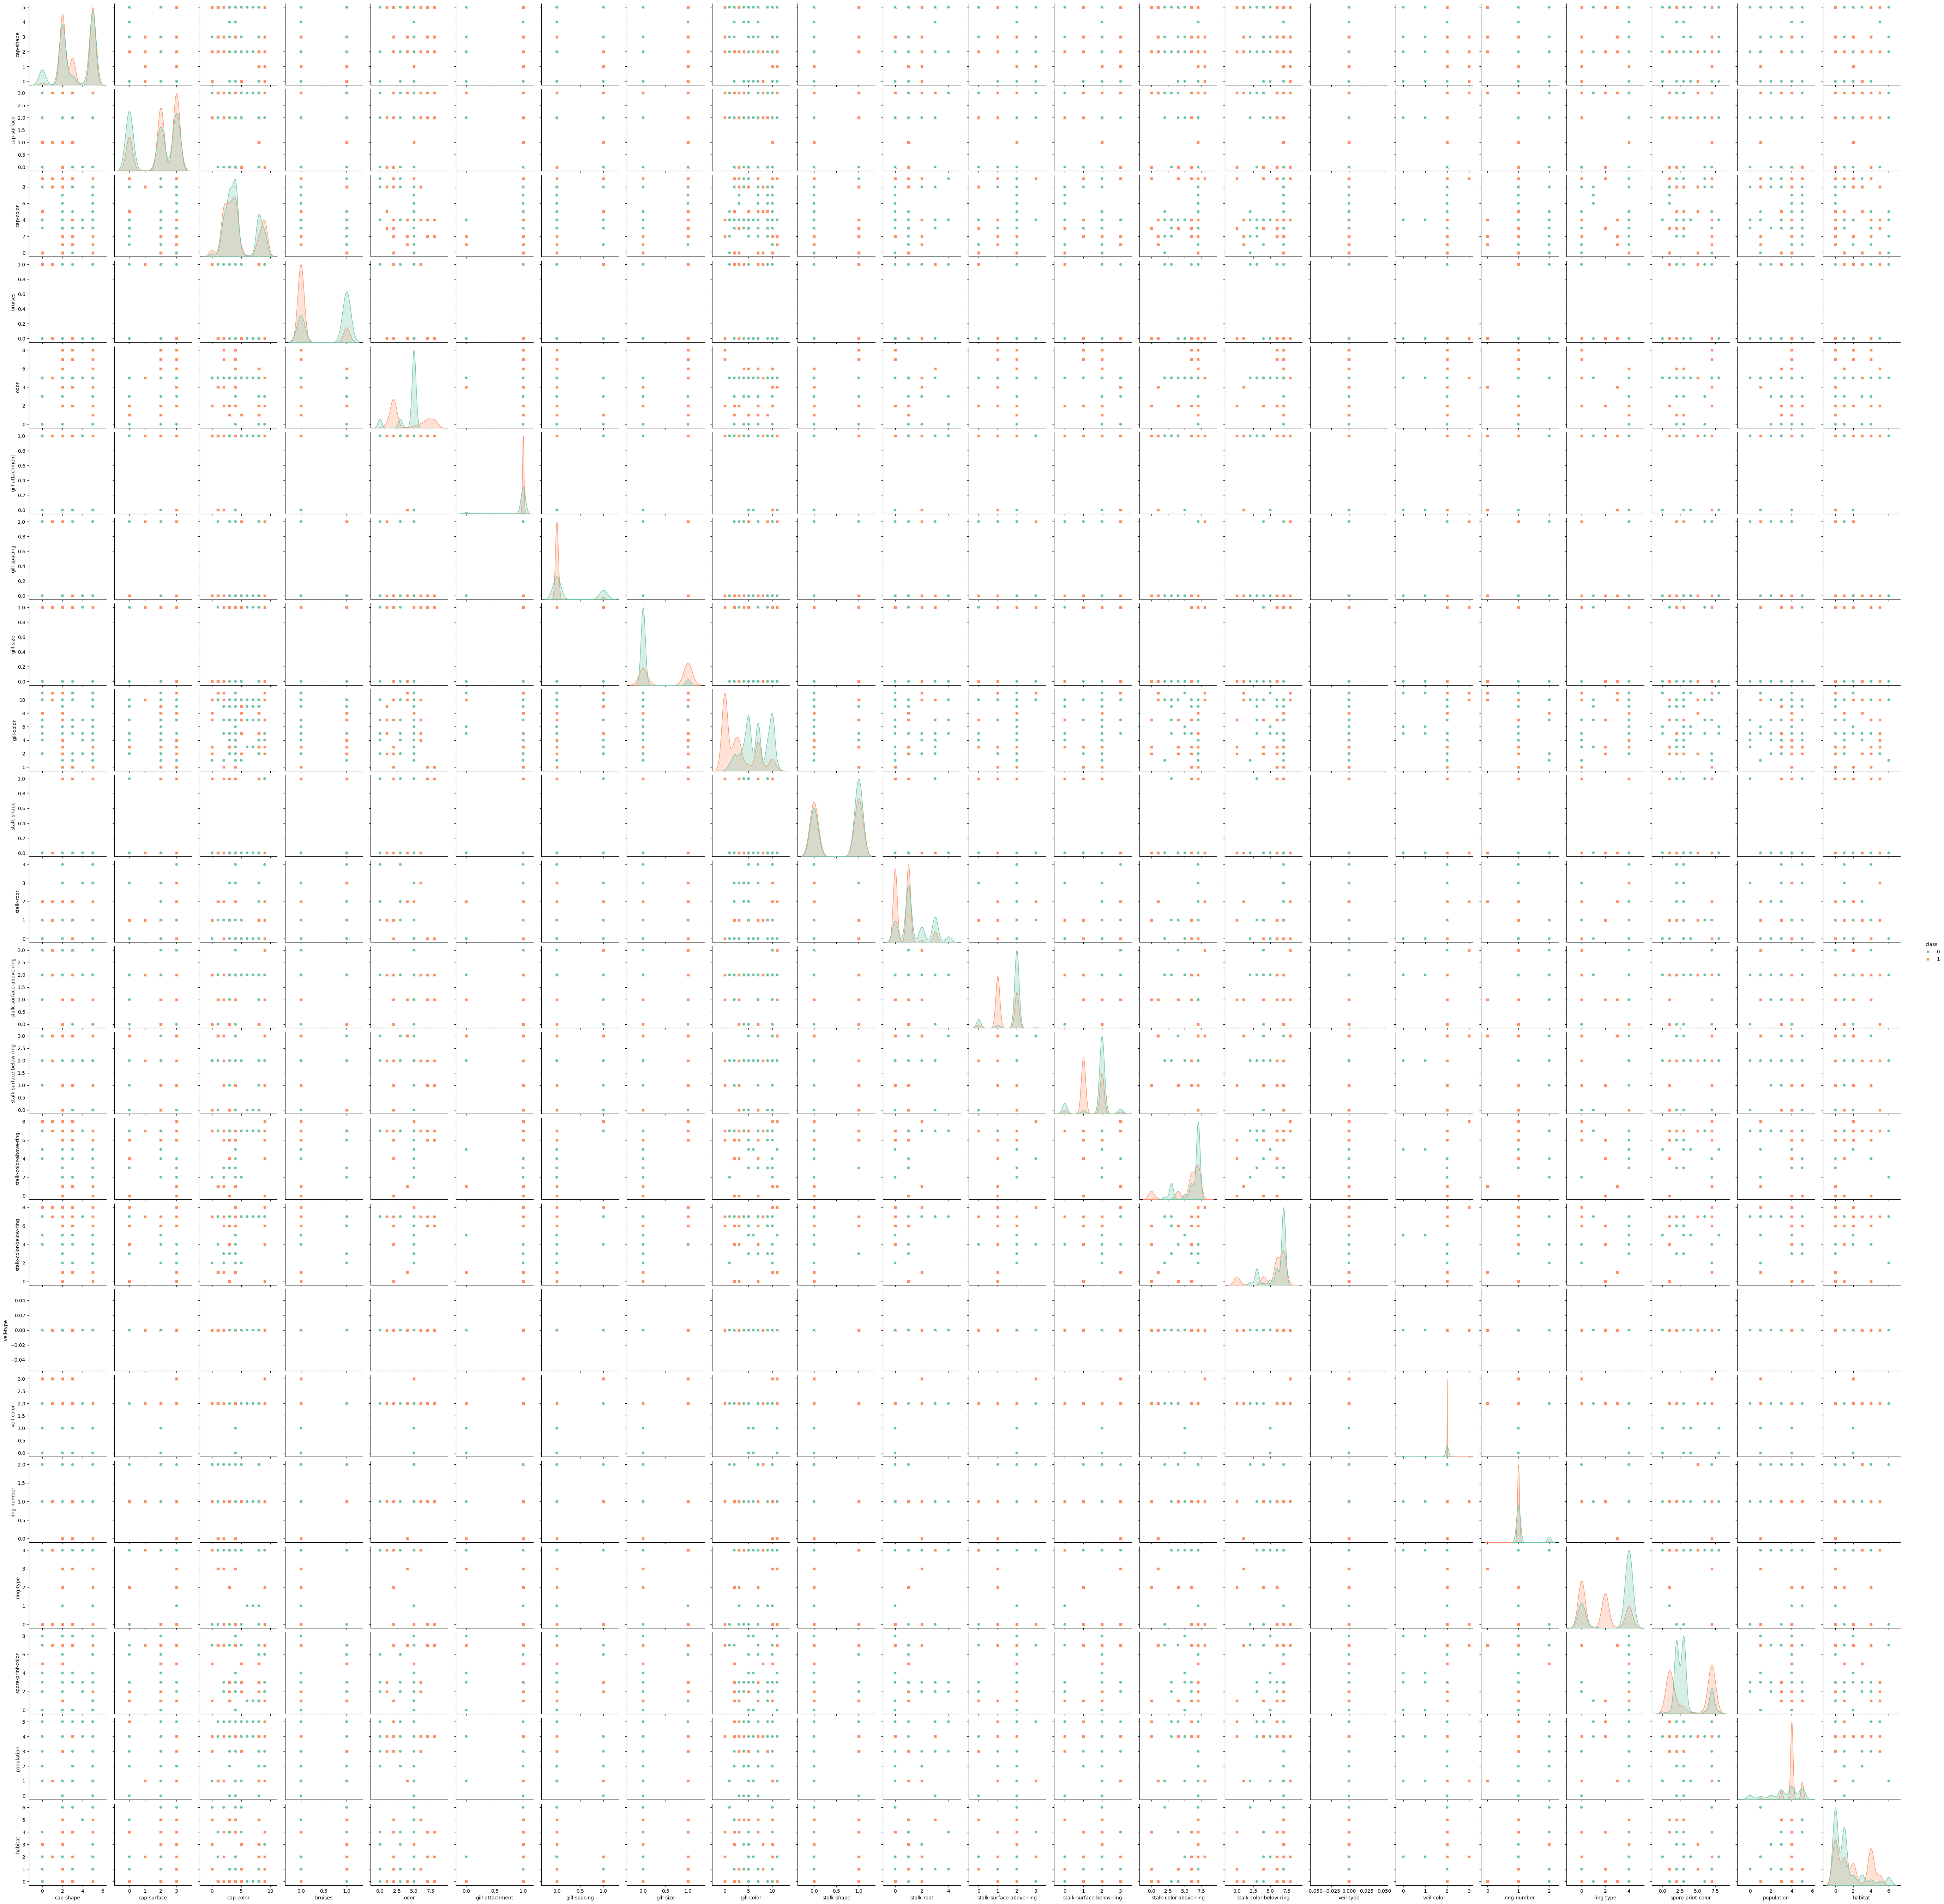

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is the preprocessed DataFrame
sns.pairplot(data, hue="class", markers=["o", "s"], palette="Set2")
plt.show()
